In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [66]:
df=pd.read_csv("C:\\Users\\Hp\\Downloads\\archive (5)\Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [67]:
X=df.drop("medv",axis=1)
y=df["medv"]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [69]:
#Standardizing the data set
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [70]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [71]:
#to inverse the transformation
scaler.inverse_transform(X_train)

array([[6.00000e+00, 2.98500e-02, 0.00000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [1.17000e+02, 1.31580e-01, 0.00000e+00, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [4.60000e+01, 1.71420e-01, 0.00000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [3.49000e+02, 1.50100e-02, 8.00000e+01, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.36000e+02, 1.11604e+01, 0.00000e+00, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [1.03000e+02, 2.28760e-01, 0.00000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [72]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score


In [74]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
mse=cross_val_score(lm,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
np.mean(mse)

-25.39922292675759

In [76]:
#prediction
predict=lm.predict(X_test)
predict

array([28.61693942, 36.30028466, 14.31747783, 26.13015646, 18.70581899,
       23.68237448, 16.58103592, 14.36386779, 22.7332411 , 19.20858225,
       24.4446439 , 19.13298699, -7.12592238, 22.39404487, 18.42961061,
       26.09090302, 20.28586961,  5.5908678 , 40.7897148 , 17.40193287,
       27.18239724, 29.96110704, 11.39733239, 22.44295669, 18.0639387 ,
       15.55736931, 23.82078096, 14.36349234, 21.91394005, 17.96983389,
       22.04084013, 24.59565913, 25.58555609, 18.79344782, 16.29084585,
       17.74089966, 31.66546188, 19.41626474, 23.66656996, 25.59616199,
       12.51566039, 31.3847964 , 42.9440455 , 18.17964226, 27.31307527,
       17.2894997 , 14.28493643, 26.85656515, 20.04672805, 30.86519764,
       21.95797082, 33.77491134, 16.16898485, 26.65939373, 39.12330782,
       22.8226728 , 18.83790583, 32.98235227, 25.20814878, 12.53346677,
       23.42327431, 31.78485242, 31.80839407, 17.16507905, 20.48956949,
       16.05460922, 20.47257935, 26.77739296, 32.11914138, 11.77

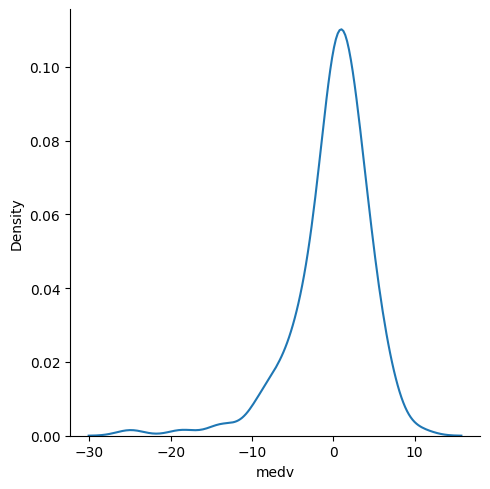

In [77]:
sns.displot(predict-y_test,kind='kde')

In [78]:
from sklearn.metrics import r2_score
score=r2_score(predict,y_test)
score

0.6706925672374324

In [79]:
#ridge regression

In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV #for hyper parameter tuning of alpha

In [81]:
ridge_regressor=Ridge()

In [82]:
#to find a good value of alpha
parameter={"alpha":[1,2,3,4,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameter,scoring="neg_mean_squared_error",cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')

In [83]:
print(ridgecv.best_score_)

-25.8775404588555


In [84]:
print(ridgecv.best_params_)

{'alpha': 1}


In [85]:
ridge_pred=ridgecv.predict(X_test)

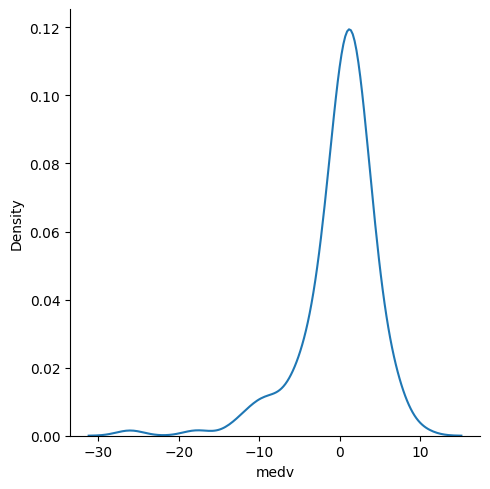

In [86]:
sns.displot(ridge_pred-y_test,kind="kde")

In [87]:
score=r2_score(ridge_pred,y_test)
score

0.6263263907816834

In [88]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()

In [89]:
parameter={"alpha":[1,2,3,4,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameter,scoring="neg_mean_squared_error",cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')

In [90]:
print(lassocv.best_params_)

{'alpha': 1}


In [91]:
lasso_pred=lassocv.predict(X_test)

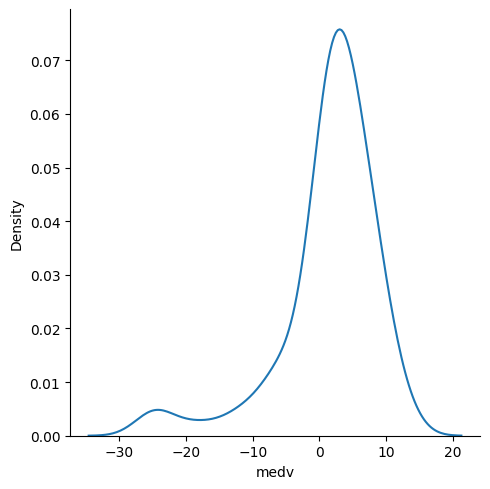

In [92]:
sns.displot(lasso_pred-y_test,kind="kde")

In [93]:
score=r2_score(lasso_pred,y_test)
score

-14.01063588577148

In [94]:
from sklearn.tree import DecisionTreeRegressor
model_tree=DecisionTreeRegressor()

In [95]:
model_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [96]:
tree_pred=model_tree.predict(X_test)

In [97]:
score=r2_score(tree_pred,y_test)
score

0.7411062561345088